# Loan Application Status Prediction

#### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset

#### Importing Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

The above dataset is the details of applicant who have applied for loan. Dataset contains 614 rows and 13 column where Loan_Status is the target variable.Loan_Staus has two variable Yes or No, so this is a classification problem. Dataset contains both Numerical and Catagorical data.

## Exploratory Data Analysis (EDA)

In [4]:
# Checking the type of dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Dataset contains object, integer and float type data. We need to apply Encoding technique for converting object data type to numeric.

In [5]:
# To get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From the brief info we can see few missing values on our dataset. We need to applying imputing technique for filling the missing values.

In [6]:
df.drop('Loan_ID', axis=1, inplace= True)

Here we have dropped the Loan_ID column since this is just a unique ID of the application and don't paly much role in prediction

Now Let's separate the Numerical and Catagorical columns

In [7]:
Catg_data = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        Catg_data.append(x)
Catg_data

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

Above are the 7 columns of Object datatype

In [10]:
Num_data = []
for x in df.dtypes.index:
    if df.dtypes[x]!='object':
        Num_data.append(x)
Num_data

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

Here are the 5 columns of Numeric datatype

In [13]:
# Checking number of unique values in each column
df.nunique().to_frame("Unique Values")

,Unique Values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10
Credit_History,2


Above is the list of no of unique value present in each column

In [15]:
# checking the count of each column

for i in df.columns:
    print(df[i].value_counts())
    print("*"*60)

Male      489
Female    112
Name: Gender, dtype: int64
************************************************************
Yes    398
No     213
Name: Married, dtype: int64
************************************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
************************************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
************************************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
************************************************************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
************************************************************
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIn

In [16]:
# Checking count of null values from the dataset.
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

From above, there are 6 columns where null value is present. We will fill this by imputation technique

#### Treating the null values

We need to treat separately fo numerical and catagorical data

In [17]:
# filling continous data columns with the mean / median value of that column
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

# filling categorical data columns with the mode value of that column
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [18]:
# Let's check the null value after imputing
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now there is no null value present in our dataset.

<AxesSubplot:>

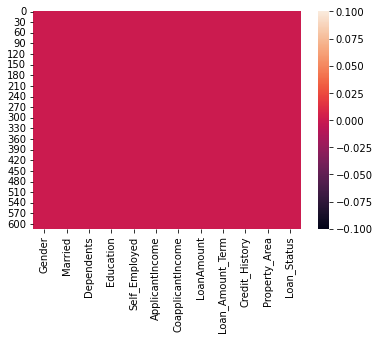

In [19]:
# Let's visualize the null values clearly through Heatmap
sns.heatmap(df.isnull())

In [20]:
# Checking the uniqueness of target variable 'Loan_Status'
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [21]:
# Checking the list of counts in target columns
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Here we can observer that maximum no Loan application is approved. Data is not balanced and we need to balance the data at later stage

In [23]:
# Statistical summary of dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


This is the descriptive statistics of our dataset.
Mean value is greater than median for column ApplicantIncome, CoapplicantIncome, LoanAmount. Which means skewness present in dataset.
There is a huge difference of standard deviation and mean value.
max value and 75%  value difference is also very high which means Outliers present in the dataset and we need to treat them. 

## Data Visualisation

#### Univariate Analysis

Male      502
Female    112
Name: Gender, dtype: int64


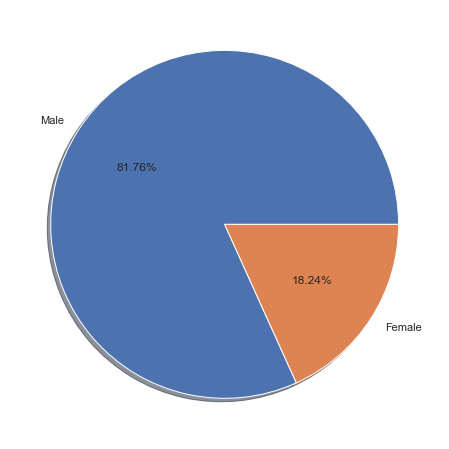

In [25]:
#Visualize the count of applicants Gender
print(df["Gender"].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Here we can see 81.76% of Applicants are Male.

Yes    401
No     213
Name: Married, dtype: int64


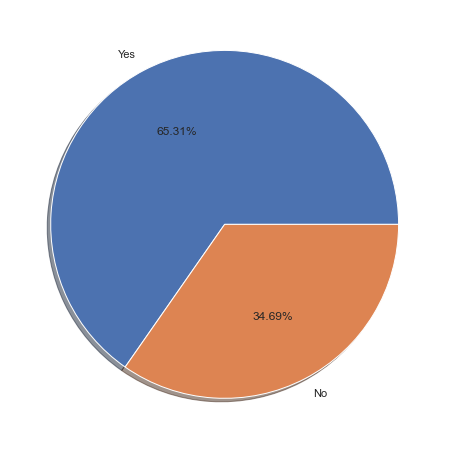

In [26]:
#Visualize the count of martial status of applicant
print(df["Married"].value_counts())
labels='Yes','No'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Married'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Maximum no of applicants apply for for loan are married, around 65.31%

Y    422
N    192
Name: Loan_Status, dtype: int64


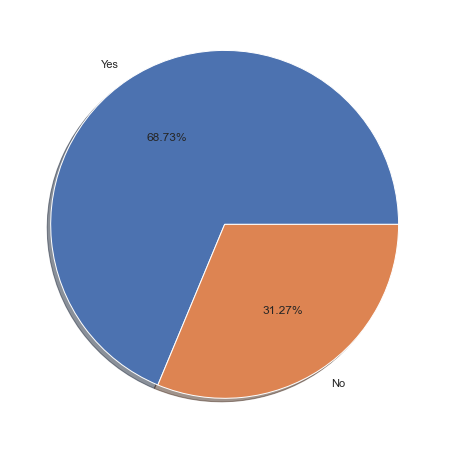

In [27]:
# Visualizing the loan approval status

print(df["Loan_Status"].value_counts())
labels='Yes','No'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Loan_Status'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Here we can see that around 68.73% of the Loan application is approved.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


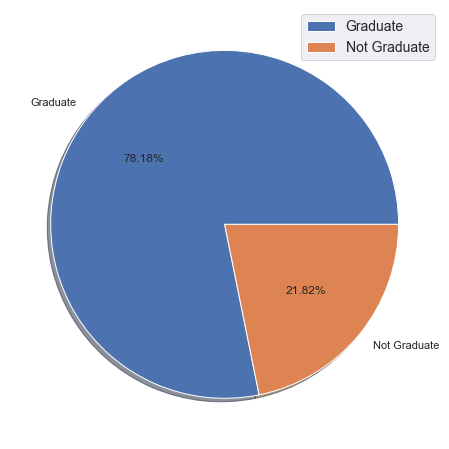

In [31]:
# Visualizing the Education status

print(df["Education"].value_counts())

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Education'].value_counts(), labels=df['Education'].value_counts().index, autopct='%1.2f%%', shadow=True)
plt.legend(prop={'size':14})
plt.show()

Most of the applicants are Graduate, around 78.18%

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


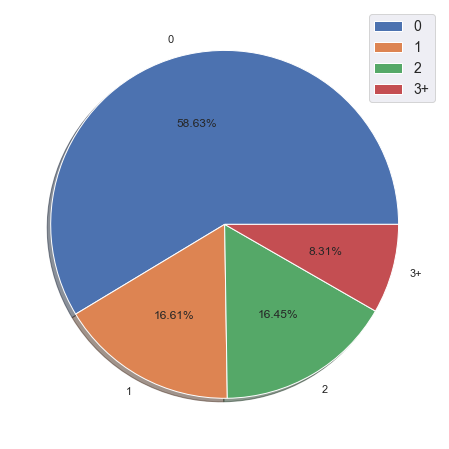

In [32]:
# Visualizing the Dependents

print(df["Dependents"].value_counts())

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Dependents'].value_counts(), labels=df['Dependents'].value_counts().index, autopct='%1.2f%%', shadow=True)
plt.legend(prop={'size':14})
plt.show()

In the above pie chart we can see the total number of dependants where 56.63% rows are for people having 0 dependents, 16.61% rows are for people having 1 dependent, 16.45% rows are for people having 2 dependents and 8.31% rows are for people having 3 or more dependents.

No     532
Yes     82
Name: Self_Employed, dtype: int64


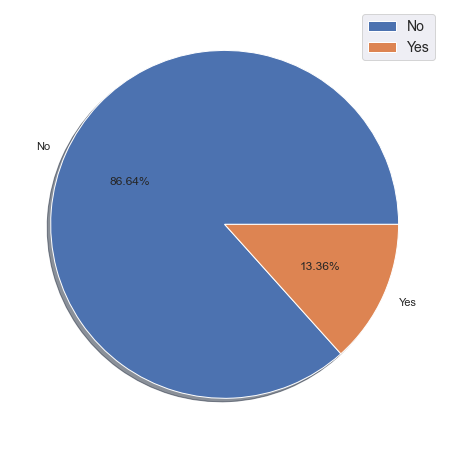

In [34]:
# Visualizing the Self_Employed 

print(df["Self_Employed"].value_counts())

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Self_Employed'].value_counts(), labels=df['Self_Employed'].value_counts().index, autopct='%1.2f%%', shadow=True)
plt.legend(prop={'size':14})
plt.show()

Most of the applicants or not self employed that means they might working in the public or private sectors and only 82 applicants are self employed and running their own bussiness.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


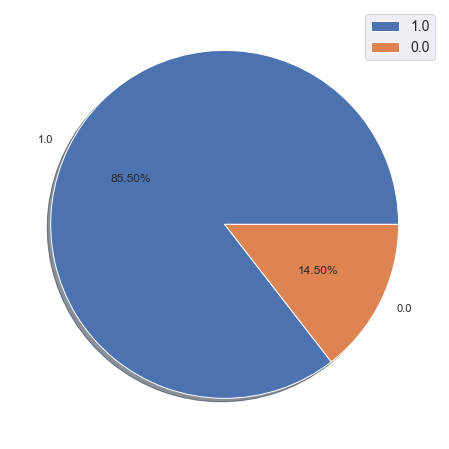

In [35]:
# Visualizing the Credit_History 

print(df["Credit_History"].value_counts())

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Credit_History'].value_counts(), labels=df['Credit_History'].value_counts().index, autopct='%1.2f%%', shadow=True)
plt.legend(prop={'size':14})
plt.show()

From above pie chart, we can see that 85.50% applicants credit history is available

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


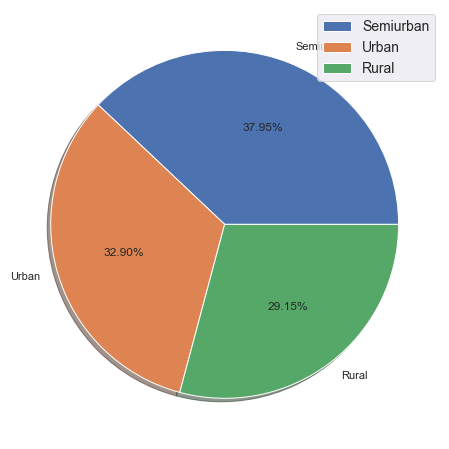

In [36]:
# Visualizing the Property_Area 

print(df["Property_Area"].value_counts())

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Property_Area'].value_counts(), labels=df['Property_Area'].value_counts().index, autopct='%1.2f%%', shadow=True)
plt.legend(prop={'size':14})
plt.show()

In the above pie chart we can see that 37.95% rows are covered by semi urban area type, 32.90% rows are covered by urban area type and 29.15% rows are covered by rural area type in our property area column.

Text(0.5, 1.0, 'LoanAmount')

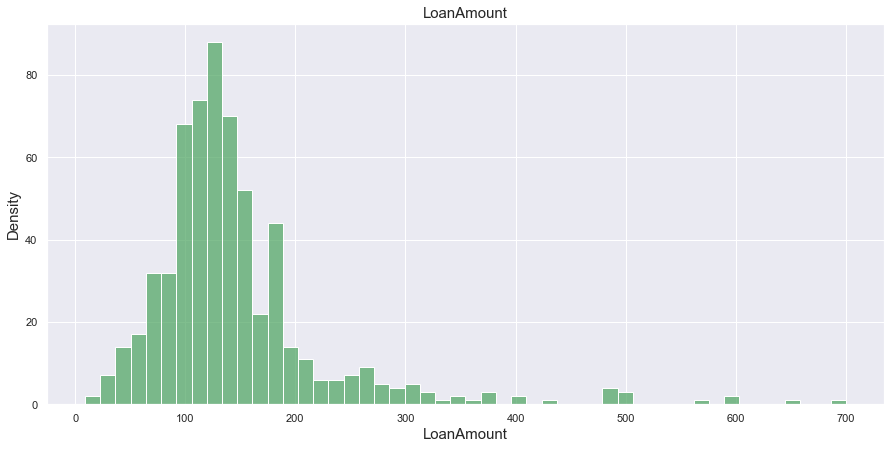

In [38]:
plt.figure(figsize=(15,7))

sns.histplot(df['LoanAmount'], bins= 50, color='g')
plt.xlabel('LoanAmount', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('LoanAmount', fontsize=15)

Here we can see most of the applicants apply loan in the range of 100-200, Loan number of applicants for loan values greater than 200 are less.

Text(0.5, 1.0, 'Loan_Amount_Term')

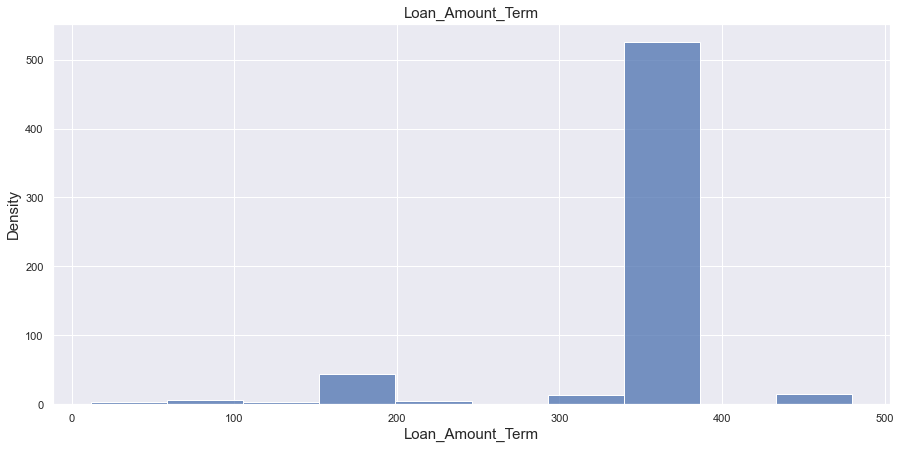

In [39]:
plt.figure(figsize=(15,7))

sns.histplot(df['Loan_Amount_Term'], bins= 10)
plt.xlabel('Loan_Amount_Term', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('Loan_Amount_Term', fontsize=15)

Here we can see most of the loan terms are lie bwteen 350-400 range.

#### Bivariate Analysis

Here visualiseing the analysis with respect to target variable

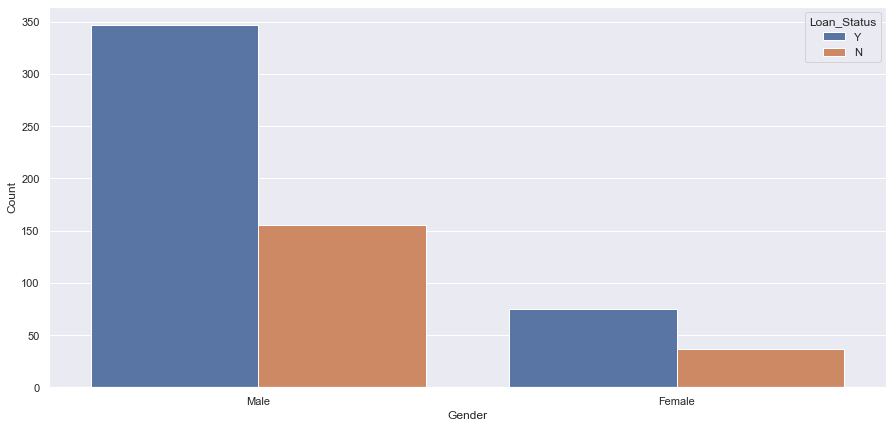

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(df['Gender'], hue='Loan_Status', data= df)
plt.xlabel('Gender', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.show()

Here we can see mostly male apply for loan and the chance for getting approval is high.

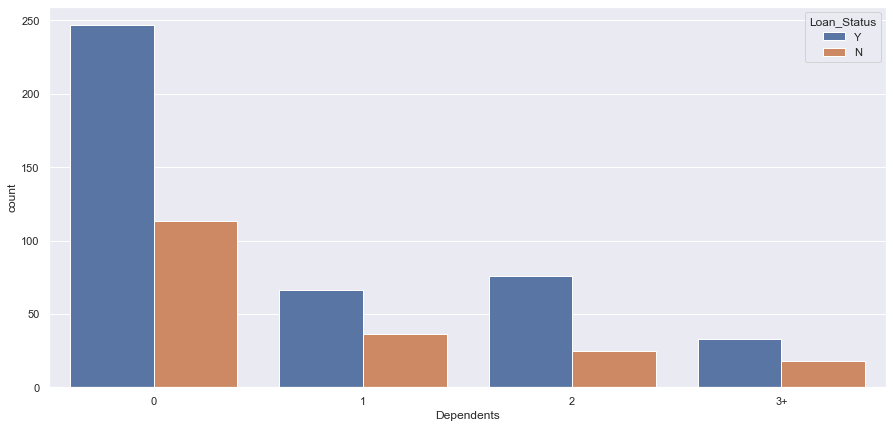

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

The count of 0 dependents is high which means most of the applicants have no dependents.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


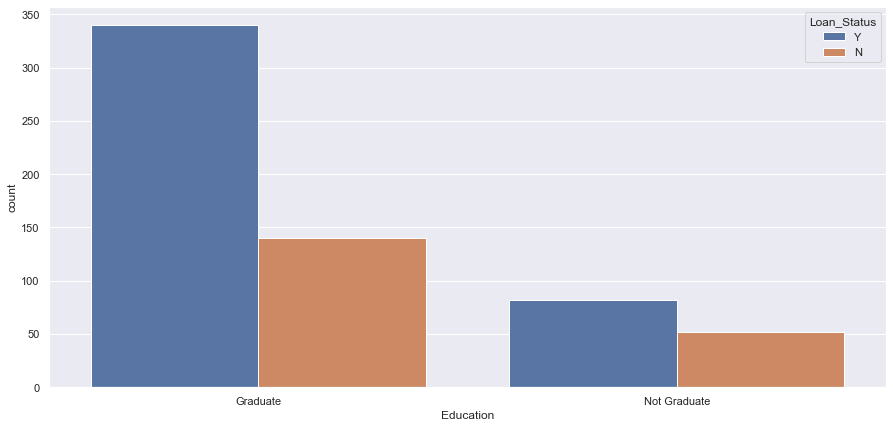

In [43]:
plt.figure(figsize=(15,7))
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

Most of the applicants who are applying for loan are graduate and only few are not graduate. Also the applicants who are graduate have tendency of getting loans than non graduate.



1.0    525
0.0     89
Name: Credit_History, dtype: int64


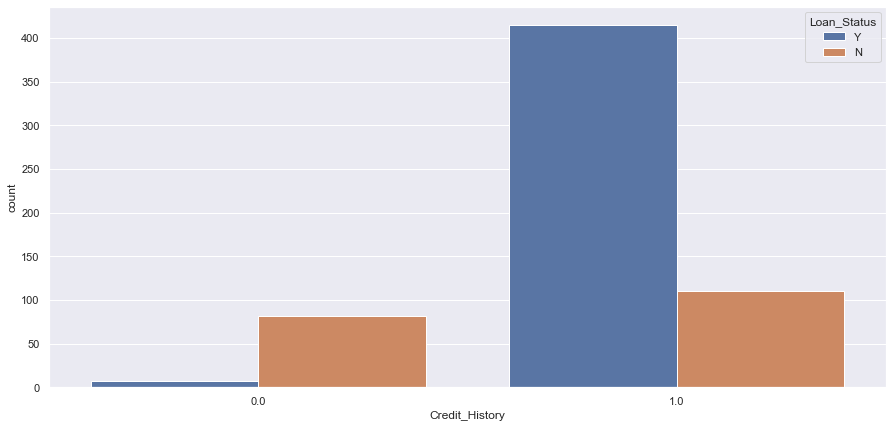

In [44]:
plt.figure(figsize=(15,7))
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])
plt.show()

Here we can see Applicant having create histry, having good chance for approval.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


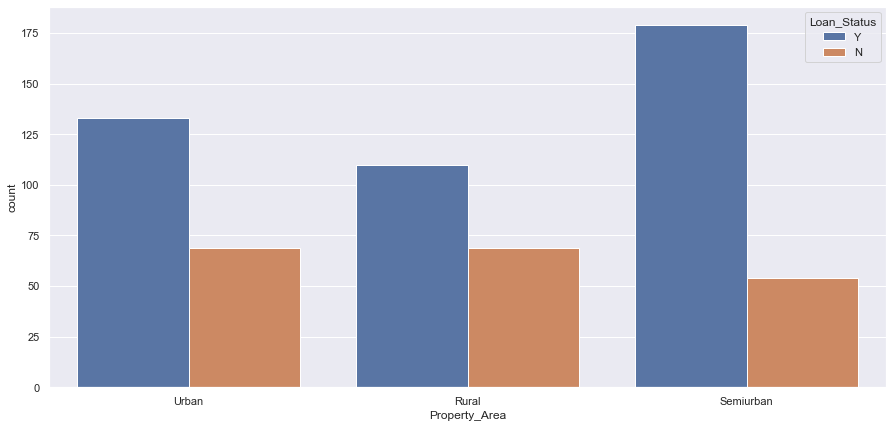

In [45]:
plt.figure(figsize=(15,7))
print(df["Property_Area"].value_counts())
sns.countplot(df["Property_Area"],hue=df["Loan_Status"])
plt.show()

Most of the applicants from the Semiurban are applying for loan followed by Urban area. Also they have more chance of getting their loan approval

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

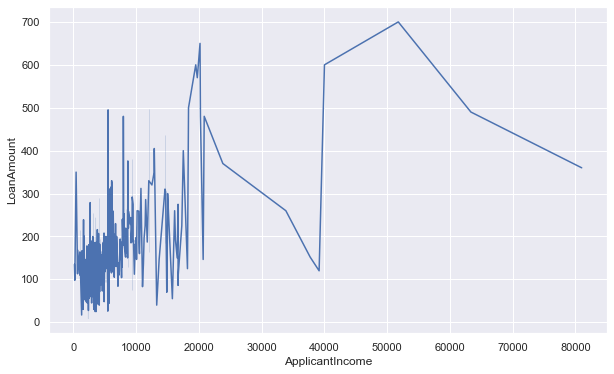

In [46]:
plt.figure(figsize=(10,6))
sns.lineplot(x='ApplicantIncome',y='LoanAmount',data=df)

We can see with increase in the income parameter loan amount also increasing. but the number of applicants are less. 

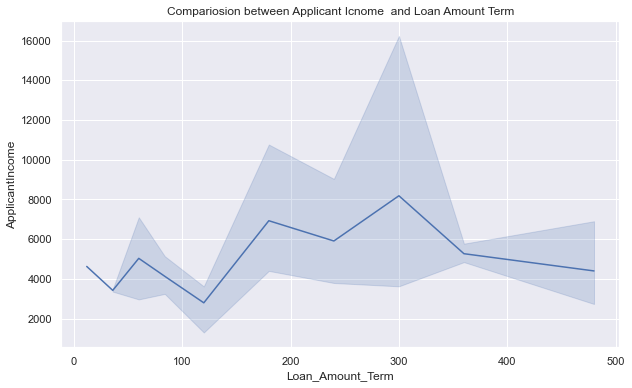

In [50]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Loan_Amount_Term",y='ApplicantIncome',data=df,)
plt.title("Compariosion between Applicant Icnome  and Loan Amount Term")
plt.show()

As the loan_Amount_Term vary with income, for high income tenure is low and low income tenure is high

<Figure size 1080x504 with 0 Axes>

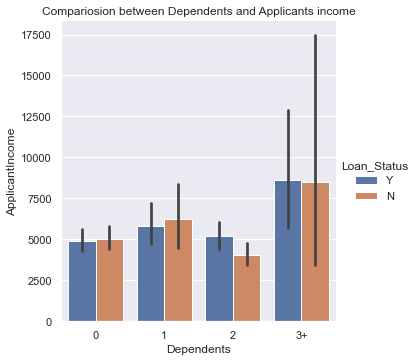

In [51]:
plt.figure(figsize=(15,7))
sns.factorplot(x="Dependents",y='ApplicantIncome',data=df,kind="bar",hue="Loan_Status")
plt.title("Compariosion between Dependents and Applicants income")
plt.show()

As dependents increase the income should increase as for sanctioning loan

#### Multivariate Analysis

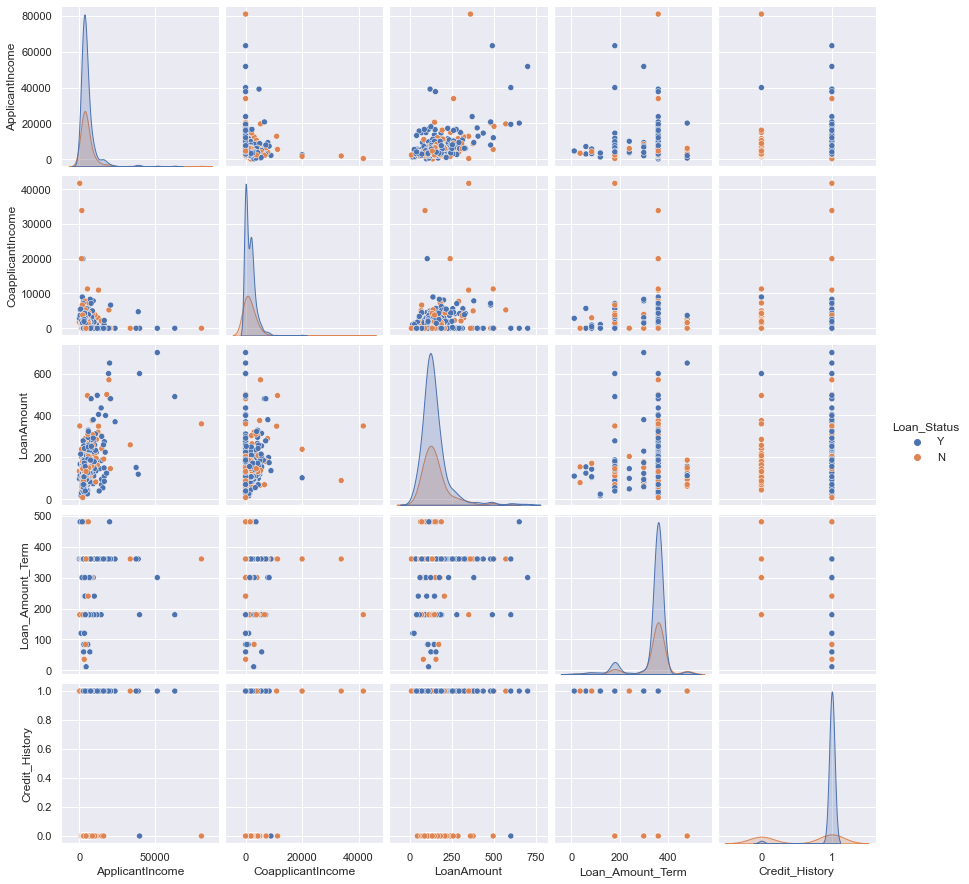

In [52]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Loan_Status")

Above is the pair wise relation between the columns and target variable.Most of the columns we can see linear relationship.

## Outliers

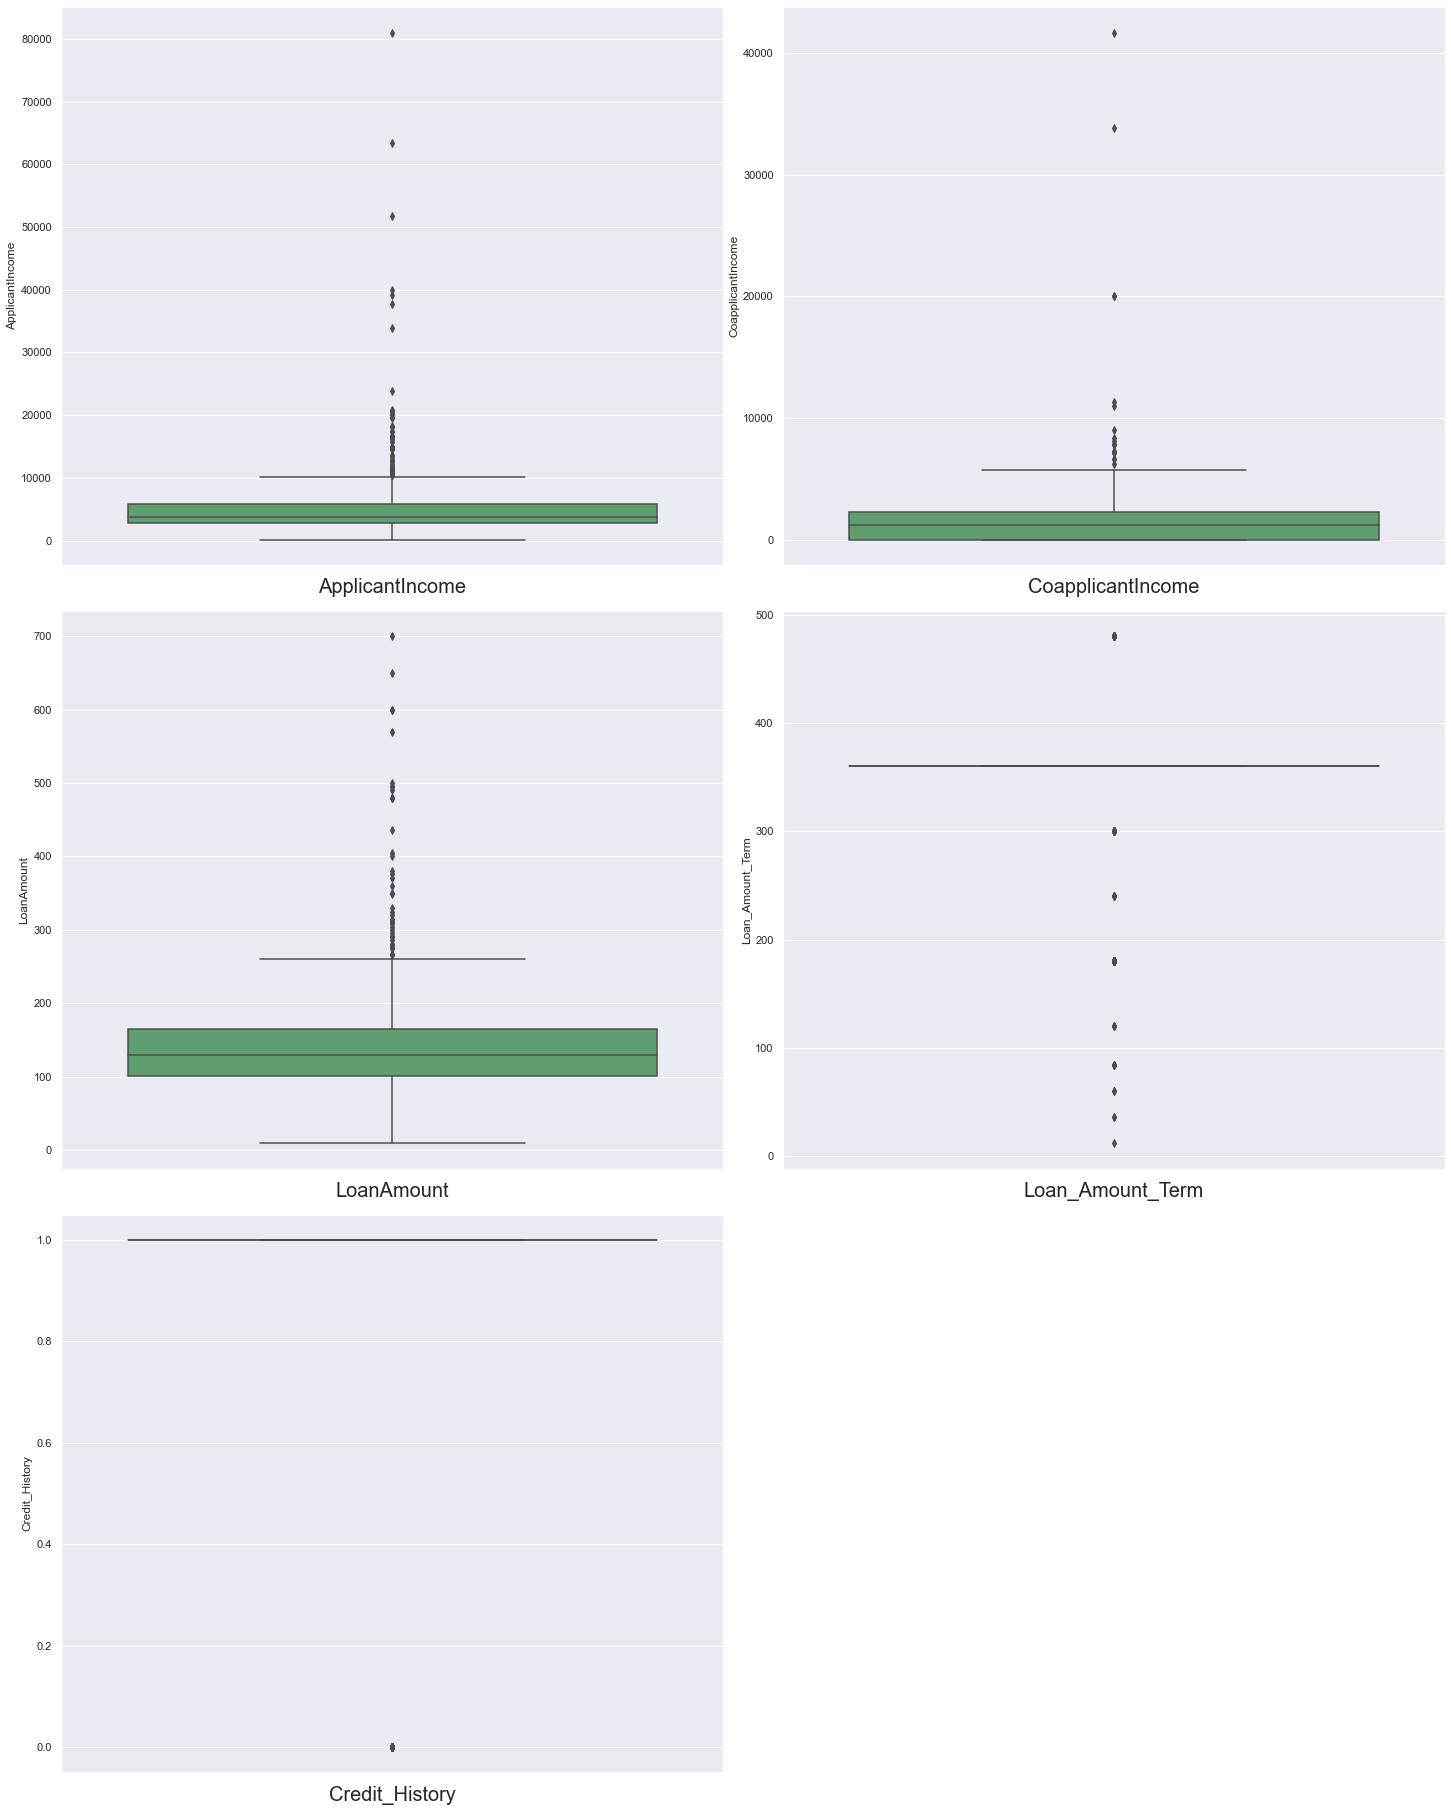

In [54]:
#Let's check the Outliers through Boxplot

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Num_data:
    if plotnumber<=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(y=column, data=df,color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

From above box plot we can see that Outliers present in all numerical columns.We will remove the outliers through Zscore method. As Credit_History has only 2 unique values, we will not treat this column for outliers.

##### Removing outliers using Zscore

In [55]:
# Features containing outliers
df1 = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

In [56]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(df1))

# Creating new dataframe
new_df=df[(z<3).all(axis=1)]
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [57]:
df.shape

(614, 12)

In [58]:
new_df.shape

(577, 12)

In [59]:
# Let's check the the data loss
data_loss = (614-577)/614*100
data_loss

6.026058631921824

In [60]:
df=new_df.copy() # Reassigning the changed dataframe name to our original dataframe name

## Skewness

In [61]:
# Checking the skewness
df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

The skewness present in all the above columns. 

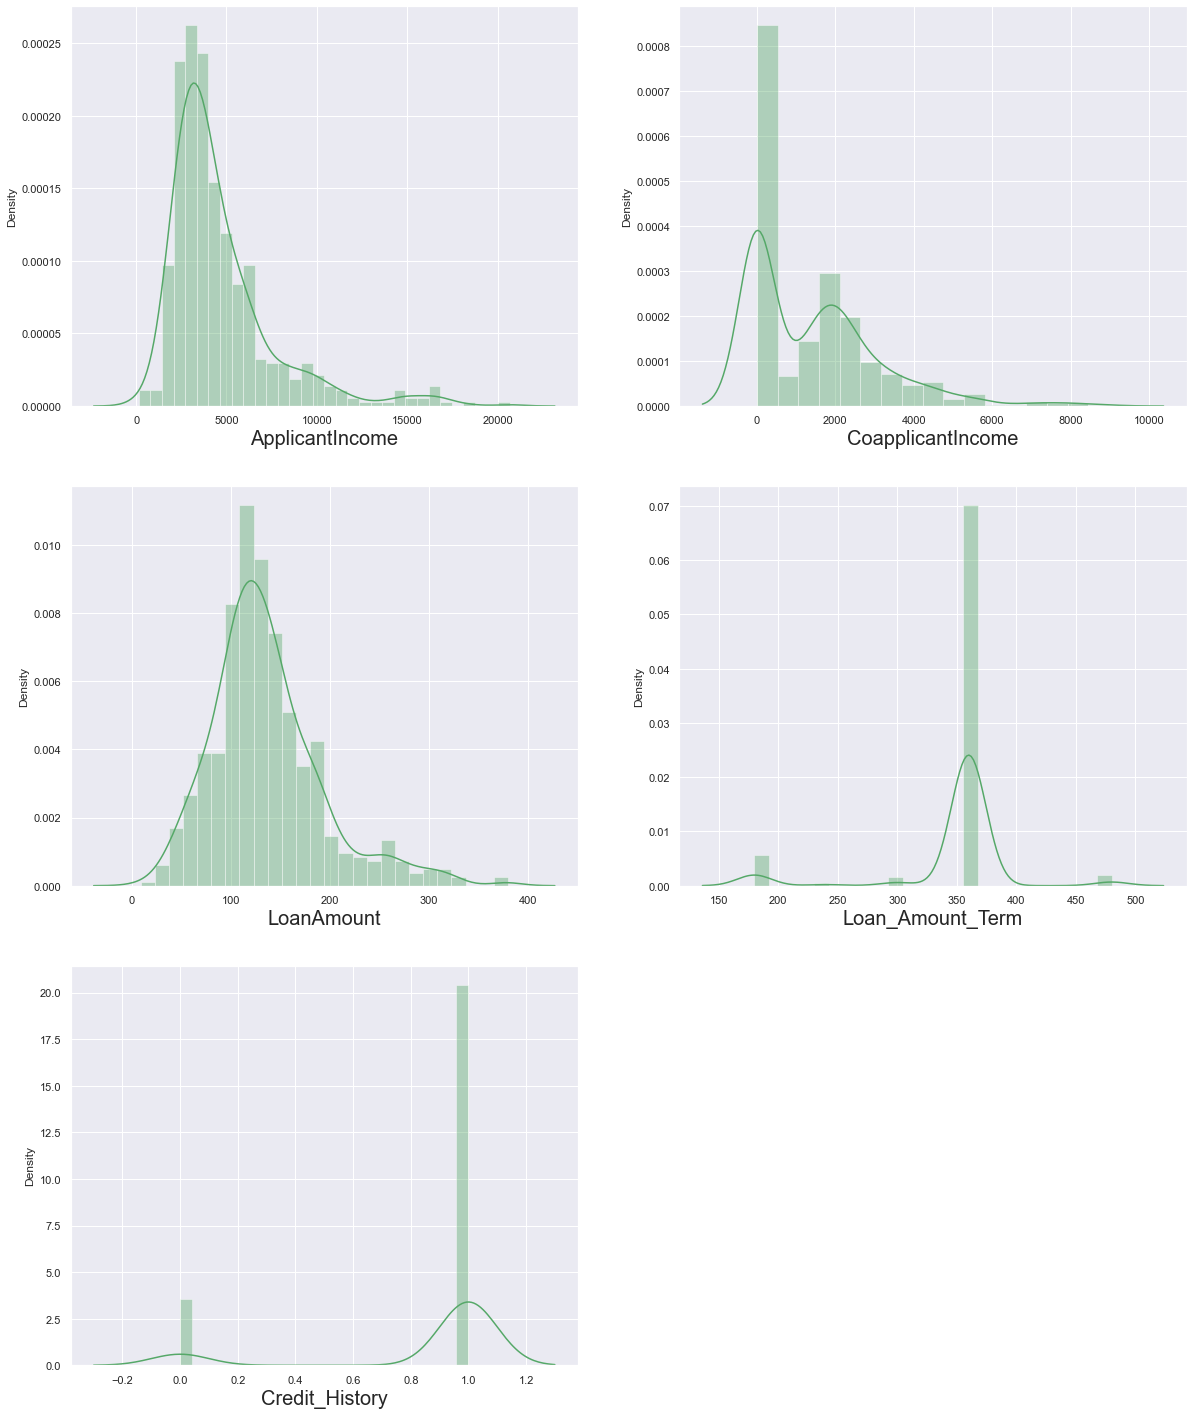

In [62]:
#Checking the skewness through Dist plot

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Num_data:
    if plotnumber<=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

Here the columns Credit_History and Loan_Amount_Term have categorical data of integer type so no need to remove skewness in these columns.

##### Removing skewness through yeo-johnson

In [63]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [64]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.316078
1,0.234783,0.744117,-0.015871
2,-0.527201,-1.122446,-1.443112
3,-0.791972,0.895786,-0.169860
4,0.728848,-1.122446,0.221481


In [66]:
# Checking the skewness after power transform
df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

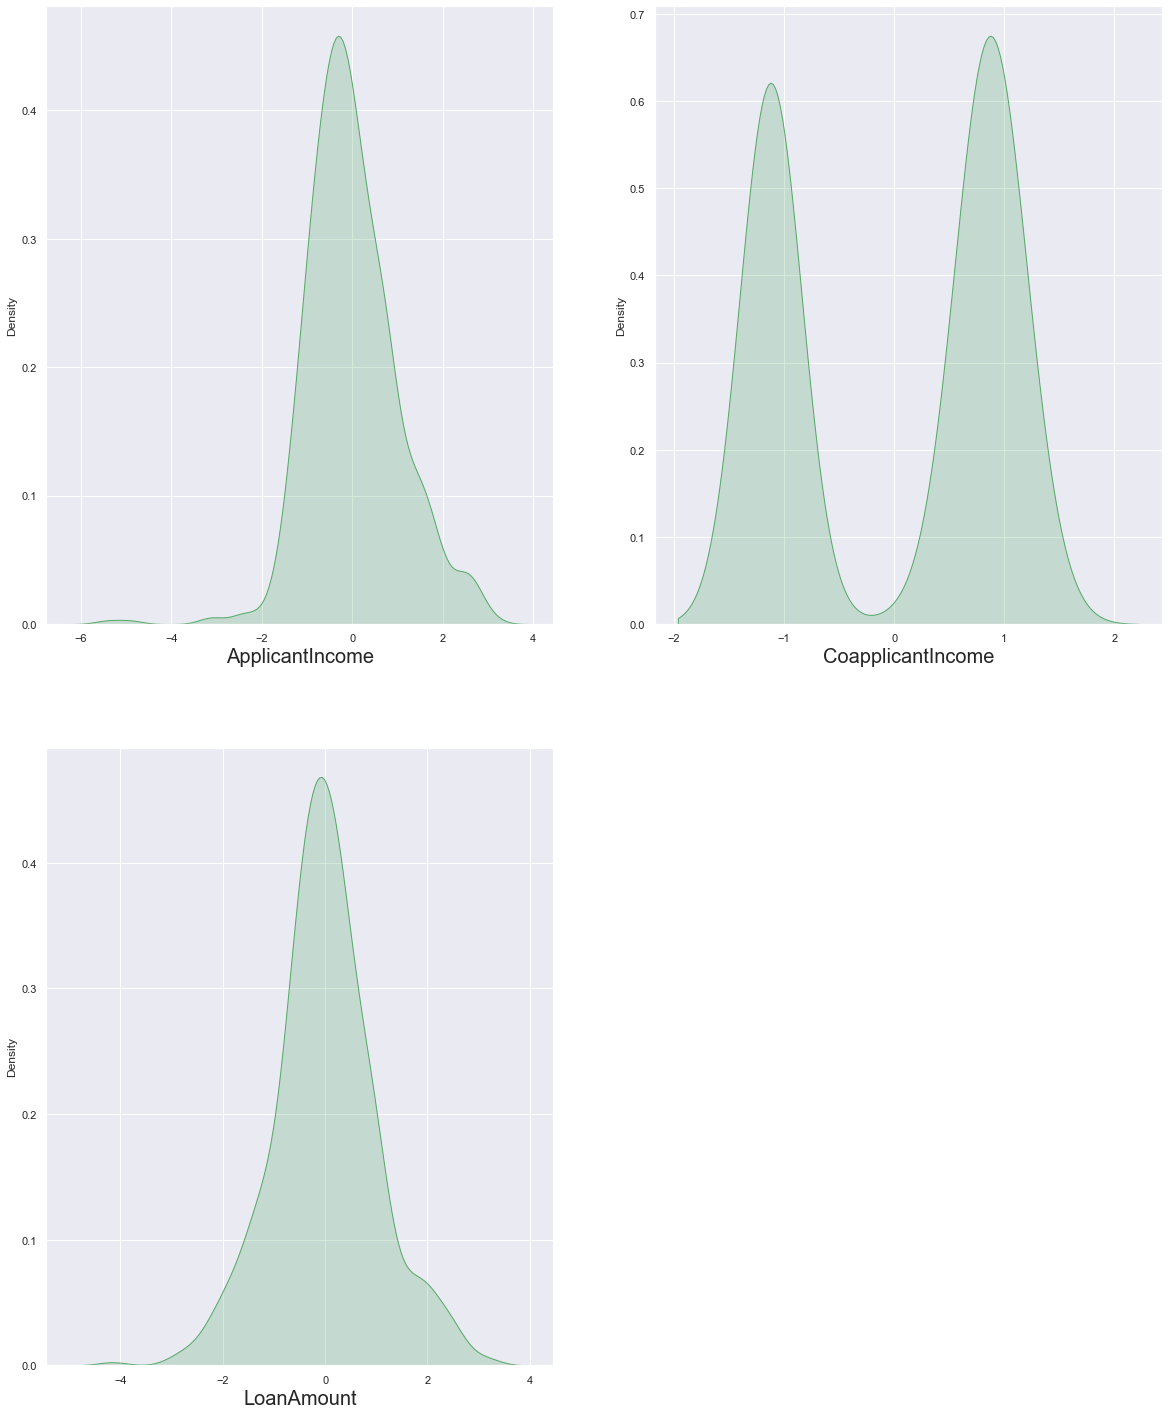

In [68]:
#Let's check the skewness again through Dist plot.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in skew:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color='g', hist=False, kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

Skewness is now removed.

### Encoding

##### Encoing Catagorical data using Label Encoding

In [69]:
Catg_data = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[Catg_data]= df[Catg_data].apply(le.fit_transform)

In [72]:
df[Catg_data]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


### Correlation

In [73]:
# Checking the correlation between features and the target
cor = df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.173082,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.182006,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131807,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.126509,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117550,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.434072,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.196334,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.173082,0.182006,0.131807,-0.126509,0.117550,0.434072,0.196334,1.000000,0.046303,-0.004330,-0.094220,-0.028999
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.046303,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.004330,0.027392,1.000000,-0.008121,0.560936


Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

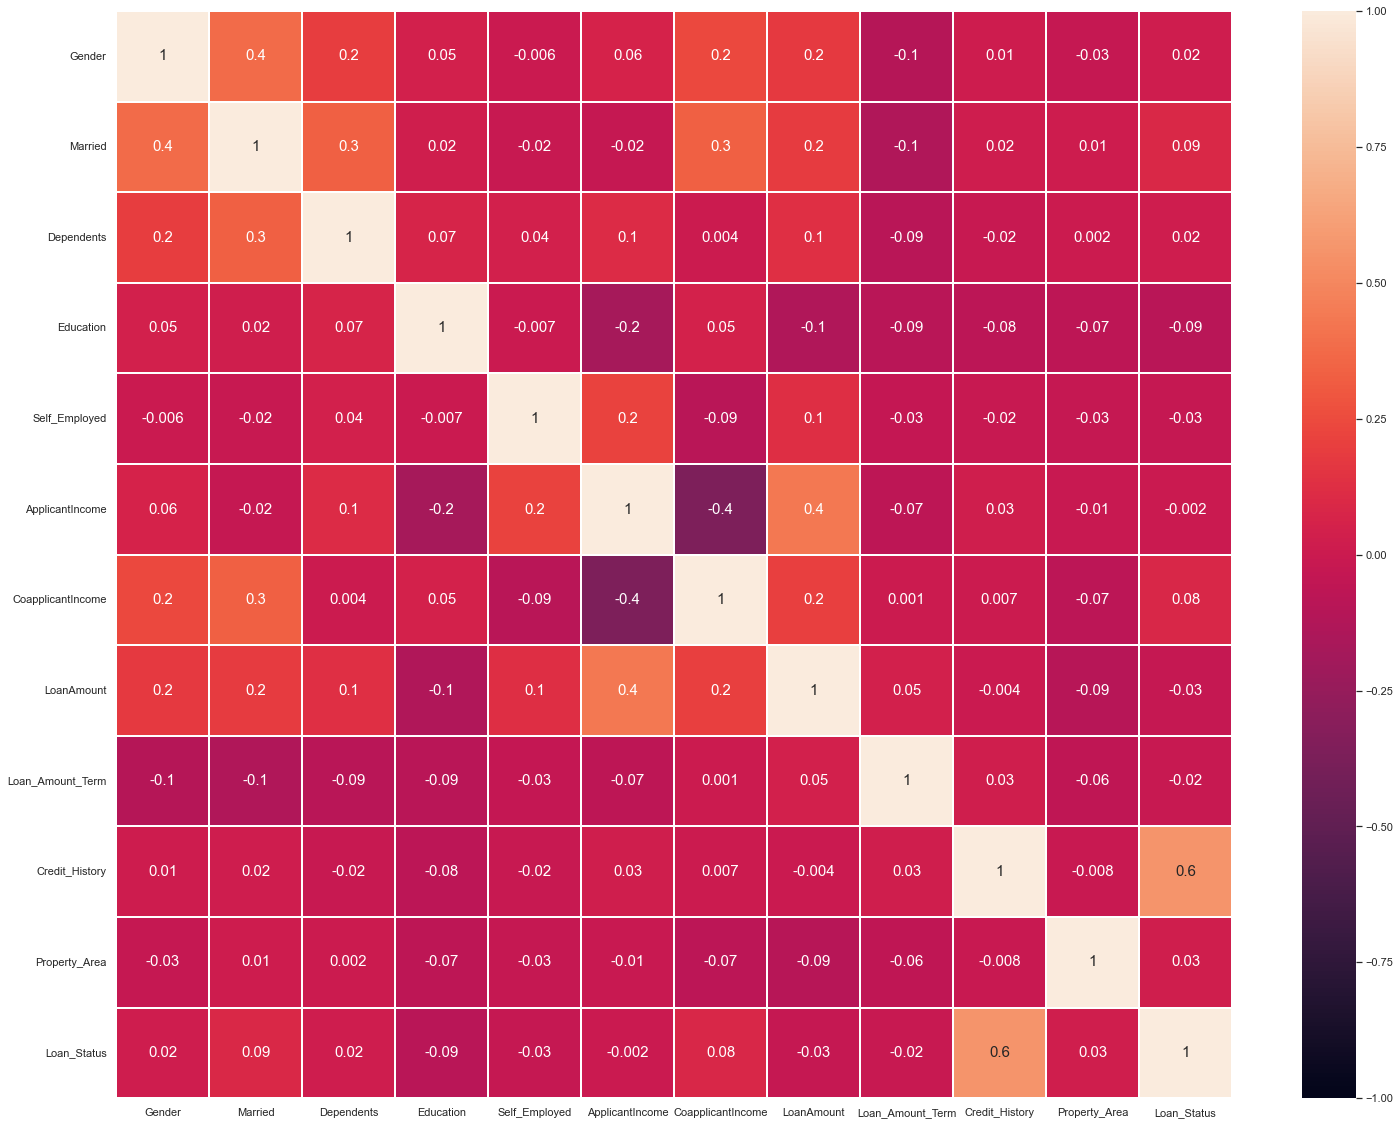

In [74]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, annot_kws={'size':15})
plt.yticks(rotation=0);

From above Heat map, we can see that Traget variable 'Loan_Status' has both positive and negative correlation. Couldn't any multicollinearity between features. Target column Loan_Status is highly positively correlated with feature Credit_History.

In [75]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.079344
Property_Area        0.026507
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.002484
Loan_Amount_Term    -0.020291
Self_Employed       -0.026525
LoanAmount          -0.028999
Education           -0.092658
Name: Loan_Status, dtype: float64

Here we can see the positive and negative correlation of target and features.

##### Visualizing the correlation between label and features using bar plot

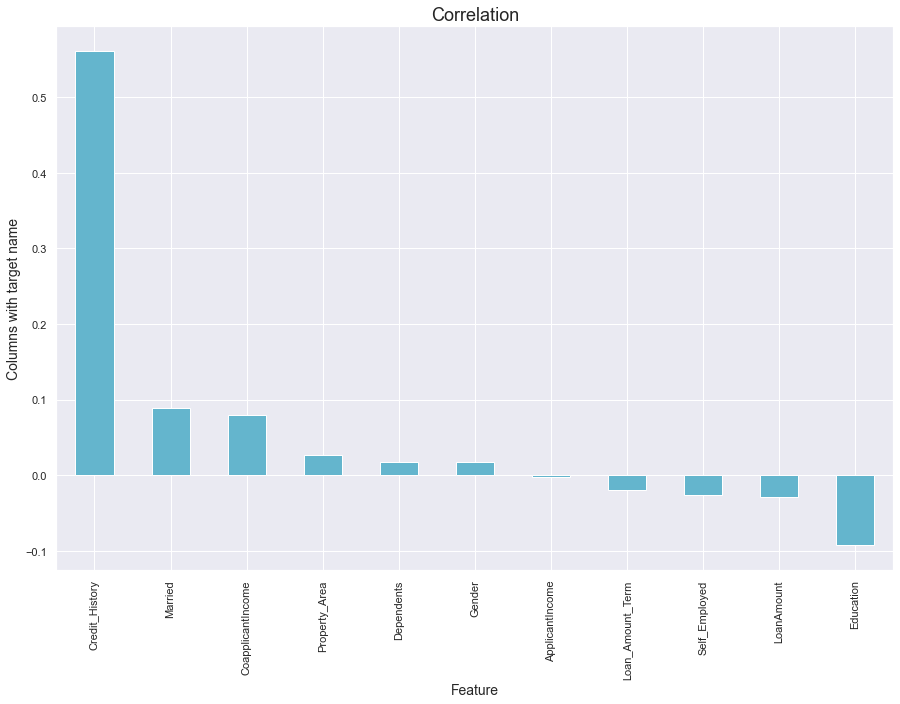

In [76]:
plt.figure(figsize=(15,10))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here the columns ApplicantIncome has very less correlation with the target so we can drop this column if necessary.

### Data preprocessing

##### Separating the independent and target variables into x and y

In [77]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [78]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

As the target variable is imbalanced, let's balance it through Oversampling method

### Oversampling

In [82]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [83]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

Our Target vaiable is now balanced.

#### Scaling data with standard scaler

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.513315,-1.245505,-0.687540,-0.511361,-0.322525,0.712396,-1.118879,0.310287,0.203354,0.567217,1.277109
1,0.513315,0.802887,0.350946,-0.511361,-0.322525,0.249566,0.748895,-0.034268,0.203354,0.567217,-1.208414
2,0.513315,0.802887,-0.687540,-0.511361,3.100538,-0.539406,-1.118879,-1.515705,0.203354,0.567217,1.277109
3,0.513315,0.802887,-0.687540,1.955567,-0.322525,-0.813556,0.900663,-0.194105,0.203354,0.567217,1.277109
4,0.513315,-1.245505,-0.687540,-0.511361,-0.322525,0.761131,-1.118879,0.212097,0.203354,0.567217,1.277109


This is our scaled data using standard scaler.

## Modeling

##### Finding best random state

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [128]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8158995815899581  on Random_state  146


Here we are getting accuracy score of 81.58% with Random state 146

Now splitting the data for Training and Testing purpose. 70% we are considering for Training and 30% for Testing purpose

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

### Logistic Regression

In [130]:
# Checking accuracy score for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7656903765690377
[[88 33]
 [23 95]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       121
           1       0.74      0.81      0.77       118

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239



### KNeighbors Classifier

In [131]:
# Checking accuracy score for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.7656903765690377
[[89 32]
 [24 94]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       121
           1       0.75      0.80      0.77       118

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239



### Decision Tree Classifier

In [132]:
# Checking accuracy score for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8117154811715481
[[98 23]
 [22 96]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       121
           1       0.81      0.81      0.81       118

    accuracy                           0.81       239
   macro avg       0.81      0.81      0.81       239
weighted avg       0.81      0.81      0.81       239



### Random Forest Classifier

In [133]:
# Checking accuracy score for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8661087866108786
[[100  21]
 [ 11 107]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       121
           1       0.84      0.91      0.87       118

    accuracy                           0.87       239
   macro avg       0.87      0.87      0.87       239
weighted avg       0.87      0.87      0.87       239



### Support Vector Machine Classifier

In [134]:
# Checking accuracy score for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7949790794979079
[[ 90  31]
 [ 18 100]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.79       121
           1       0.76      0.85      0.80       118

    accuracy                           0.79       239
   macro avg       0.80      0.80      0.79       239
weighted avg       0.80      0.79      0.79       239



### Gradient Boosting Classifier

In [135]:
# Checking accuracy score for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8242677824267782
[[ 93  28]
 [ 14 104]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       121
           1       0.79      0.88      0.83       118

    accuracy                           0.82       239
   macro avg       0.83      0.82      0.82       239
weighted avg       0.83      0.82      0.82       239



### AdaBoost Classifier

In [136]:
# Checking accuracy score for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.8075313807531381
[[94 27]
 [19 99]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       121
           1       0.79      0.84      0.81       118

    accuracy                           0.81       239
   macro avg       0.81      0.81      0.81       239
weighted avg       0.81      0.81      0.81       239



#### Checking the cross validation score

In [95]:
from sklearn.model_selection import cross_val_score

In [137]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.7538364779874213


In [138]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.7537893081761007


In [139]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7550550314465407


In [140]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8178852201257861


In [141]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.7613915094339623


In [142]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.7525707547169811


In [143]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.7400393081761008


From the above observation, looking at the accuracy score and the cross validation score we conclude that KNN Classifier is our best fitting model

## Hyper Parameter Tuning

In [121]:
from sklearn.model_selection import GridSearchCV

In [144]:
# KNeighbors Classifier
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance'],
              'p':[1,2,3,4,5]}

In [145]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [146]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [147]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

In [148]:
Loan = KNN(algorithm='auto', leaf_size=10, n_neighbors=3, weights='distance',p=1)
Loan.fit(x_train, y_train)
pred = Loan.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

79.9163179916318


After Hyperparameter Tuning, accuracy score is 79.91%

### Plotting ROC-AUC curve

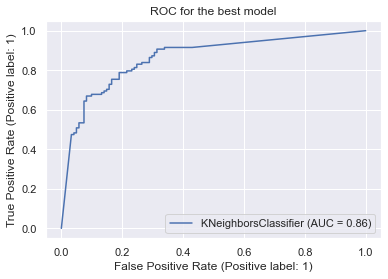

In [150]:
# Let's check the Auc for the best model after hyper parameter tuning
from sklearn.metrics import plot_roc_curve 

plot_roc_curve(Loan, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

Here I have generated the ROC Curve for final model and it shows the AUC score for my final model 86%

## Saving the model

In [152]:
# Saving the model using .pkl
import joblib
joblib.dump(Loan,"Loan Application Status Prediction.pkl")

['Loan Application Status Prediction.pkl']

#### Predicting the saved model

In [153]:
# Loading the saved model
model=joblib.load("Loan Application Status Prediction.pkl")

#Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
234,1,1
235,1,1
236,0,0
237,1,1


## Conclusion

The objective is to predict whether a loan of an applicant will be approved or not, we have explored various Classification technique for predicting the application status and found KNeighborsClassifier predicts the best result.